<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [128]:
## Write your code here
# Examine the structure of the dataset
print(df.shape)           # Shows the number of rows and columns
print(df.columns)         # Lists all column names
print(df.info())          # Provides data types and non-null counts
print(df.describe())      # Shows summary statistics for numerical columns


(65437, 115)
Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'Employment_Simplified'],
      dtype='object', length=115)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 115 entries, ResponseId to Employment_Simplified
dtypes: float64(13), int64(1), object(101)
memory usage: 57.4+ MB
None
         ResponseId      CompTotal       WorkExp  JobSatPoints_1  \
count  65437.000000   3.374000e+04  29658.000000    29324.000000   
mean   32719.000000  2.963841e+145     11.466957       18.581094   
std    18890.179119  5.444117e+147      9.168709       25.966221   
min        1.000000   0.000000e+00      0.000000        0.000000   
25%    16360.000000   6.000000e+04      4.0000

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



### Step 3: Clean and Prepare the Data

This section consolidates all preprocessing steps into a single, streamlined block:

* **Removed duplicate rows** using a subset of key demographic and professional columns.
* **Dropped unnecessary columns** (`Respondent`, `MiscTechHaveWorkedWith`, `MiscTechWantToWorkWith`) that were not needed for analysis.
* **Imputed missing values**:

  * `YearsCodePro`: Converted to numeric and filled with the median.
  * `EdLevel`: Filled with the mode (most common education level).
  * `RemoteWork`: Filled with the mode (most common work arrangement).
* **Trained a linear regression model** to predict `ConvertedCompYearly` from `CompTotal`, using only rows below the 75th percentile in both columns to reduce skew from outliers.
* **Imputed missing `ConvertedCompYearly` values** using predictions from the regression model.
* **Capped extreme values** of `ConvertedCompYearly` at the 99th percentile to remove outliers.
* **Printed the regression model coefficients** and R² score used for imputation to verify consistency with earlier labs.


In [13]:
# Step 3: Clean and Prepare the Data

# Remove duplicates based on key identifying columns
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]
df_cleaned = df.drop_duplicates(subset=subset_cols)

# Drop unnecessary columns
cols_to_drop = ['Respondent', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith']
df_cleaned = df_cleaned.drop(columns=cols_to_drop, errors='ignore')

# Impute missing values
df_cleaned['YearsCodePro'] = pd.to_numeric(df_cleaned['YearsCodePro'], errors='coerce')
df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)

edlevel_mode = df_cleaned['EdLevel'].mode(dropna=True)[0]
df_cleaned['EdLevel'].fillna(edlevel_mode, inplace=True)

remotework_mode = df_cleaned['RemoteWork'].mode(dropna=True)[0]
df_cleaned['RemoteWork'].fillna(remotework_mode, inplace=True)

# Filter for regression (below 75th percentile in both columns)
q3_comptotal = df_cleaned['CompTotal'].quantile(0.75)
q3_converted = df_cleaned['ConvertedCompYearly'].quantile(0.75)

filtered_df = df_cleaned[
    (df_cleaned['CompTotal'] <= q3_comptotal) &
    (df_cleaned['ConvertedCompYearly'] <= q3_converted)
]

# Fit regression model: CompTotal → ConvertedCompYearly
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np

regression_df = filtered_df[['CompTotal', 'ConvertedCompYearly']].dropna()
X_train = regression_df['CompTotal'].values.reshape(-1, 1)
y_train = regression_df['ConvertedCompYearly'].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
r2 = r2_score(y_train, y_pred)

# Display regression info used for imputation
print("Regression model used to impute ConvertedCompYearly:")
print(f"  Slope     = {model.coef_[0][0]:.4f}")
print(f"  Intercept = {model.intercept_[0]:.2f}")
print(f"  R² Score  = {r2:.4f}")

# Fill missing ConvertedCompYearly values using the model
missing_mask = df_cleaned['ConvertedCompYearly'].isnull() & df_cleaned['CompTotal'].notnull()
predicted_values = model.predict(df_cleaned.loc[missing_mask, 'CompTotal'].values.reshape(-1, 1))
df_cleaned.loc[missing_mask, 'ConvertedCompYearly'] = predicted_values.flatten()

# Cap ConvertedCompYearly at the 99th percentile to remove outliers
cap = df_cleaned['ConvertedCompYearly'].quantile(0.99)
df_cleaned['ConvertedCompYearly'] = df_cleaned['ConvertedCompYearly'].clip(upper=cap)


Regression model used to impute ConvertedCompYearly:
  Slope     = 0.2738
  Intercept = 34606.32
  R² Score  = 0.1524


C:\Users\dlbox\AppData\Local\Temp\ipykernel_15276\4175005037.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['YearsCodePro'].fillna(df_cleaned['YearsCodePro'].median(), inplace=True)
C:\Users\dlbox\AppData\Local\Temp\ipykernel_15276\4175005037.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting val

In [15]:
print(df_cleaned['ConvertedCompYearly'].describe())

count    3.297000e+04
mean     1.160236e+05
std      2.378099e+05
min      1.000000e+00
25%      4.296200e+04
50%      6.476200e+04
75%      1.074060e+05
max      2.028369e+06
Name: ConvertedCompYearly, dtype: float64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [18]:
## Write your code here
# Analyze distribution of key columns

# Employment status
print("Employment Distribution:\n")
print(df_cleaned['Employment'].value_counts(dropna=False))
print("\n")

# Job Satisfaction
print("Job Satisfaction Distribution:\n")
print(df_cleaned['JobSat'].value_counts(dropna=False))
print("\n")

# Professional Coding Experience
print("Years of Professional Coding Experience Distribution:\n")
print(df_cleaned['YearsCodePro'].value_counts(bins=10, sort=False))  # optional: bin to reduce granularity


Employment Distribution:

Employment
Employed, full-time                                                                                                                                  35963
Independent contractor, freelancer, or self-employed                                                                                                  4747
Student, full-time                                                                                                                                    3763
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                              3487
Not employed, but looking for work                                                                                                                    2091
                                                                                                                                                     ...  
Employed, full-time;Student, full

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


In [20]:
# Count the number of unique non-null values in 'JobSat'
unique_jobsat = df['JobSat'].nunique(dropna=True)

# Display the result
print(f"Number of unique values in 'JobSat': {unique_jobsat}")
print('')
print(df['JobSat'].dropna().unique())
print('')
print(df['JobSat'].value_counts(dropna=True))

Number of unique values in 'JobSat': 11

[ 8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]

JobSat
8.0     7509
7.0     6379
6.0     3751
9.0     3626
10.0    2251
5.0     1956
3.0     1165
4.0     1130
2.0      772
0.0      311
1.0      276
Name: count, dtype: int64


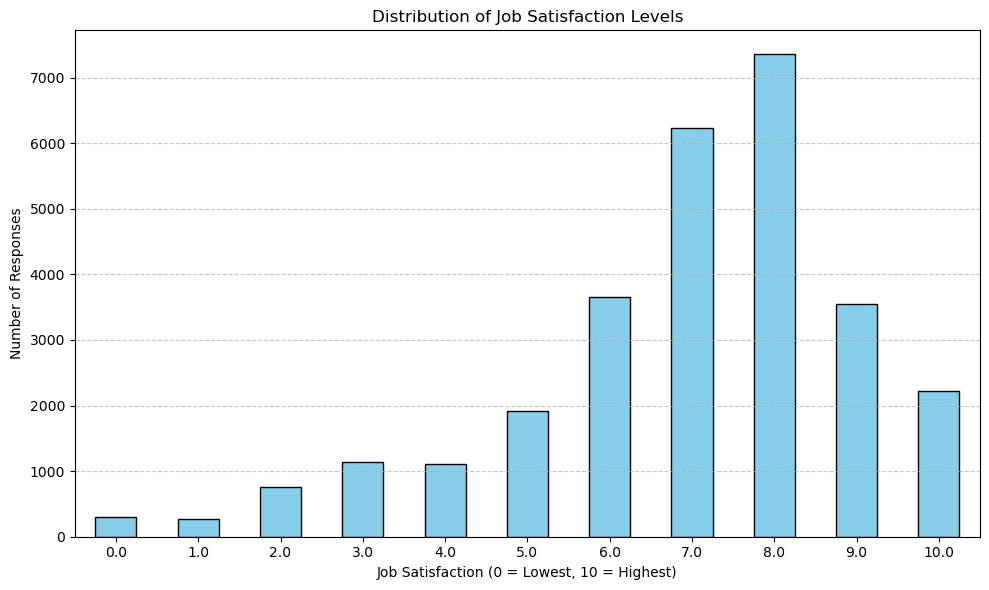

In [22]:
## Write your code here
import matplotlib.pyplot as plt

# Value counts sorted by satisfaction level (0–10)
job_sat_counts = df_cleaned['JobSat'].value_counts(dropna=True).sort_index()

# Create bar chart
plt.figure(figsize=(10, 6))
job_sat_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction (0 = Lowest, 10 = Highest)')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Interpretation:
> The distribution of job satisfaction ratings is **skewed toward the higher end**, with most respondents selecting ratings from **6 to 10**. The mode is **8**, suggesting general satisfaction among this subset of respondents. However, 55% of the `JobSat` values are missing** (as determined in previous lab exercise), so these findings may not be representative of the entire dataset.


### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [28]:
## Write your code here
# Split and count languages
from collections import Counter

# Drop missing values
worked_langs = df_cleaned['LanguageHaveWorkedWith'].dropna().str.split(';')
wanted_langs = df_cleaned['LanguageWantToWorkWith'].dropna().str.split(';')

# Flatten and count
worked_counts = Counter(lang.strip() for sublist in worked_langs for lang in sublist)
wanted_counts = Counter(lang.strip() for sublist in wanted_langs for lang in sublist)

# Convert to DataFrames for easier plotting/merging
df_worked = pd.DataFrame.from_dict(worked_counts, orient='index', columns=['HaveWorkedWith'])
df_wanted = pd.DataFrame.from_dict(wanted_counts, orient='index', columns=['WantToWorkWith'])

# Combine
language_df = df_worked.join(df_wanted, how='outer').fillna(0).astype(int)
language_df = language_df.sort_values(by='HaveWorkedWith', ascending=False)

# Preview
language_df.head(10)


,HaveWorkedWith,WantToWorkWith
JavaScript,35850,22821
HTML/CSS,30462,19953
SQL,29466,21570
Python,29421,24016
TypeScript,22239,19438
Bash/Shell (all shells),19746,13332
Java,17265,10080
C#,15579,12352
C++,13185,10387
C,11620,7920


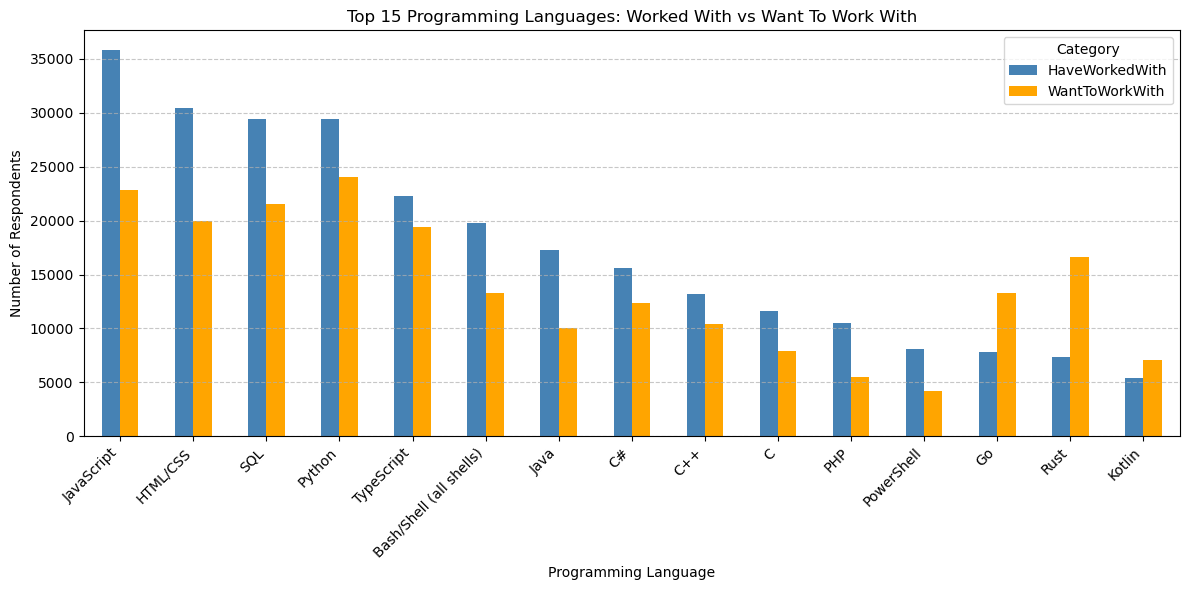

In [30]:
# Plot top 15 languages by experience
top_n = 15
top_langs = language_df.head(top_n)

top_langs.plot(kind='bar', figsize=(12, 6), color=['steelblue', 'orange'])
plt.title(f'Top {top_n} Programming Languages: Worked With vs Want To Work With')
plt.ylabel('Number of Respondents')
plt.xlabel('Programming Language')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Insights from Programming Language Preferences

* **JavaScript**, **HTML/CSS**, **SQL**, and **Python** dominate both categories — widely used and still in demand.
* **Rust** and **Go** stand out with **much higher "want to work with" counts** than "have worked with" — clear indicators of emerging popularity.
* **Older languages** like **PHP**, **C**, and **PowerShell** show relatively high usage but **less desire to use them in the future**.
* The gap between the blue and orange bars helps highlight where **demand for experience exceeds current supply** — potentially a strategic edge for upskilling!


### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


In [34]:
!pip install matplotlib

In [46]:
## Write your code here
# Load the dataset that includes country/region information
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df_countries = pd.read_csv(data_url)  # Replace with actual file path or URL if needed
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Impute missing values in RemoteWork using the mode
remote_mode = df_countries['RemoteWork'].mode(dropna=True)[0]
df_countries['RemoteWork'].fillna(remote_mode, inplace=True)

# Optional: Confirm imputation
print("Missing RemoteWork values after imputation:", df_countries['RemoteWork'].isnull().sum())

# Display preview
df_countries.head()



Missing RemoteWork values after imputation: 0


C:\Users\dlbox\AppData\Local\Temp\ipykernel_15276\694252256.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_countries['RemoteWork'].fillna(remote_mode, inplace=True)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [50]:
country_mapping = {
    'United States of America': 'USA',
    'United Kingdom of Great Britain and Northern Ireland': 'UK and N. Ireland',
    'Iran, Islamic Republic of...': 'Iran',
    'Hong Kong (S.A.R.)': 'Hong Kong',
    'Venezuela, Bolivarian Republic of...': 'Venezuela',
    'Democratic People\'s Republic of Korea': 'North Korea',
    'Republic of Korea': 'South Korea',
    'Russian Federation': 'Russia',
    'Lao People\'s Democratic Republic': 'Laos',
    'Syrian Arab Republic': 'Syria',
    'United Republic of Tanzania': 'Tanzania',
    'Republic of Moldova': 'Moldova',
    'Palestinian Territory': 'Palestine',
    'Micronesia, Federated States of...': 'Micronesia',
    'Congo, Republic of the...': 'Congo',
    'Democratic Republic of the Congo': 'DR Congo',
    'Bosnia and Herzegovina': 'Bosnia',
    'Libyan Arab Jamahiriya': 'Libya',
    'Bolivia, Plurinational State of...': 'Bolivia'
}

# Apply the mapping
df_countries['Country'] = df_countries['Country'].replace(country_mapping)

# Optional: fill in missing values
df_countries['Country'] = df_countries['Country'].fillna('Unknown')

In [52]:
# Step 1: Apply your country mapping first (from earlier step)
df_countries['Country'] = df_countries['Country'].replace(country_mapping)
df_countries['Country'] = df_countries['Country'].fillna('Unknown')

# Step 2: Count frequencies
country_counts = df_countries['Country'].value_counts()

# Step 3: Identify countries that appear fewer than 5 times
low_freq_countries = country_counts[country_counts < 5].index

# Step 4: Replace them with 'Other'
df_countries['Country'] = df_countries['Country'].apply(lambda x: 'Other' if x in low_freq_countries else x)

print(df_countries['Country'].value_counts(dropna=False))

Country
USA                    11095
Unknown                 6507
Germany                 4947
India                   4231
UK and N. Ireland       3224
                       ...  
Botswana                   5
Suriname                   5
Cape Verde                 5
Antigua and Barbuda        5
Namibia                    5
Name: count, Length: 150, dtype: int64


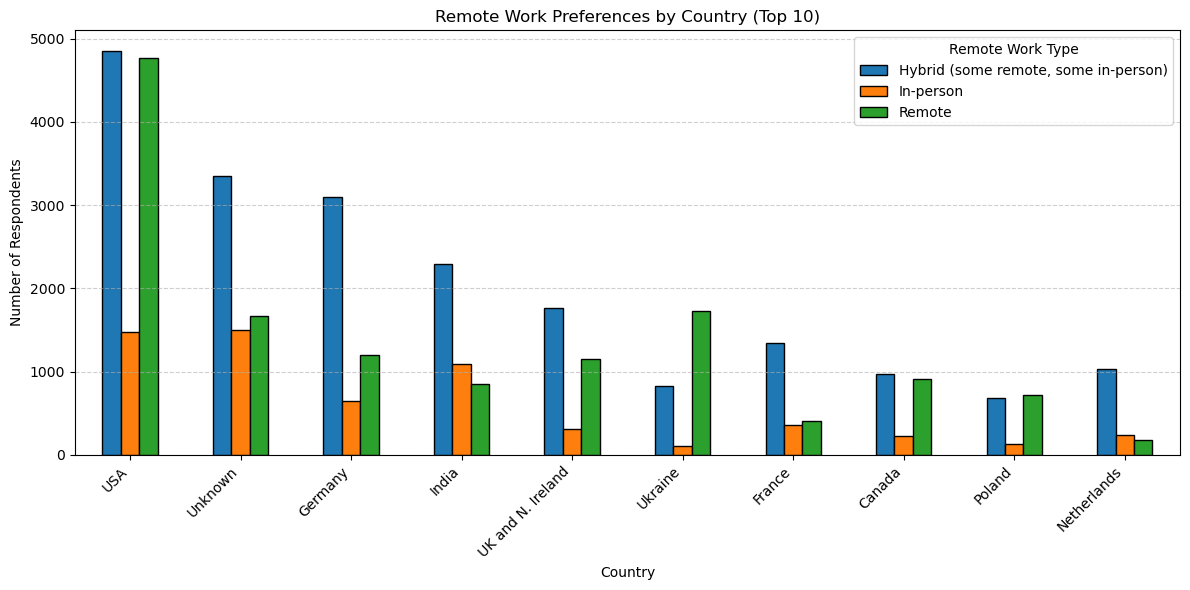

In [54]:
import matplotlib.pyplot as plt

# Get top 10 countries by respondent count
top_countries = df_countries['Country'].value_counts().head(10).index

# Group by Country and RemoteWork, then reshape for plotting
remote_by_country = (
    df_countries[df_countries['Country'].isin(top_countries)]
    .groupby(['Country', 'RemoteWork'])
    .size()
    .unstack(fill_value=0)
    .reindex(index=top_countries)  # Ensure correct order
)

# Plot grouped bar chart
remote_by_country.plot(kind='bar', figsize=(12, 6), edgecolor='black')
plt.title('Remote Work Preferences by Country (Top 10)')
plt.ylabel('Number of Respondents')
plt.xlabel('Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Remote Work Type')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


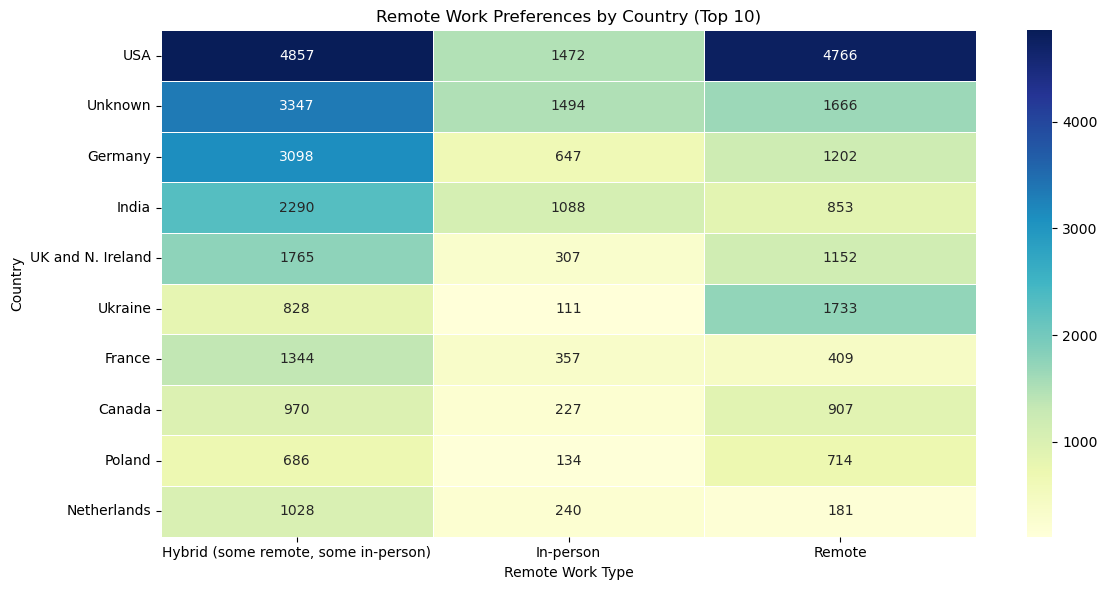

In [56]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(remote_by_country, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)
plt.title('Remote Work Preferences by Country (Top 10)')
plt.ylabel('Country')
plt.xlabel('Remote Work Type')
plt.tight_layout()
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [59]:
## Write your code here
# Drop rows with missing values in either column
df_corr = df_cleaned[['JobSat', 'YearsCodePro']].dropna()

# Compute both Pearson and Spearman correlations
pearson_corr = df_corr.corr(method='pearson').iloc[0, 1]
spearman_corr = df_corr.corr(method='spearman').iloc[0, 1]

print(f"Pearson correlation between JobSat and YearsCodePro: {pearson_corr:.4f}")
print(f"Spearman correlation between JobSat and YearsCodePro: {spearman_corr:.4f}")


Pearson correlation between JobSat and YearsCodePro: 0.1031
Spearman correlation between JobSat and YearsCodePro: 0.1174


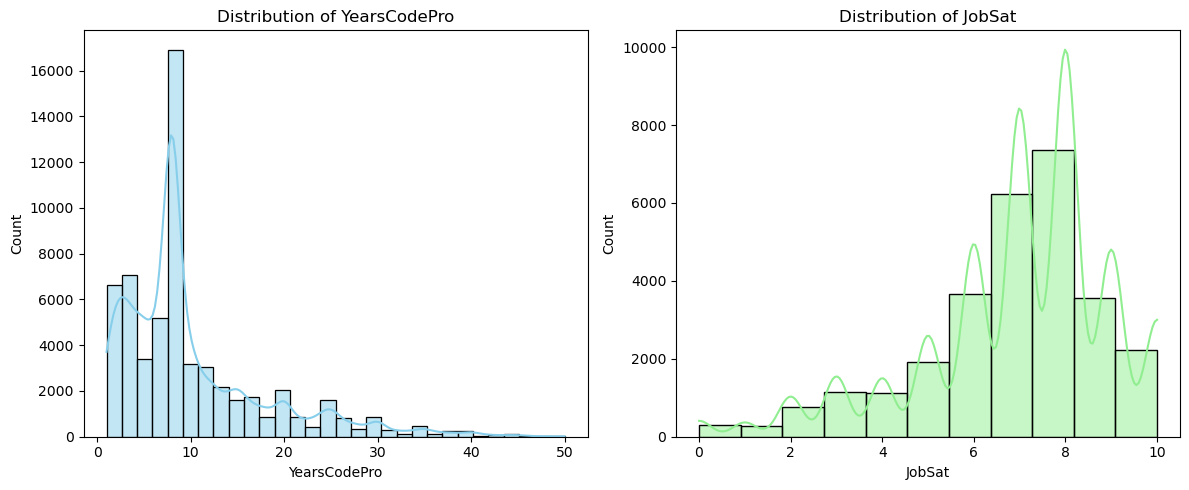

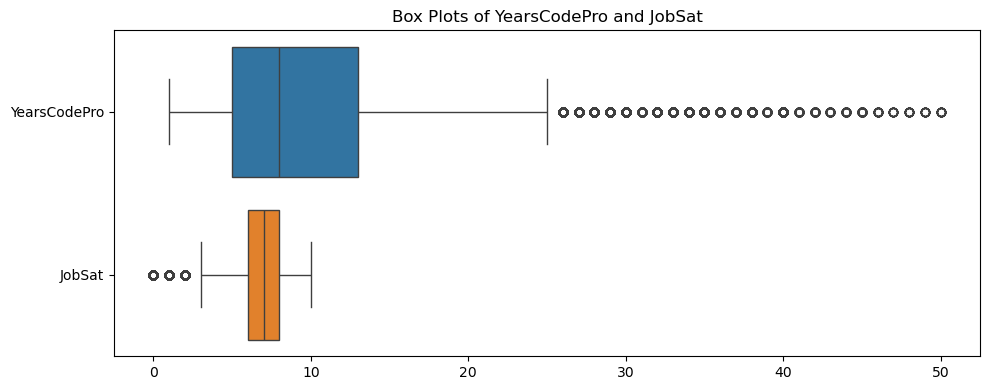

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_cleaned['YearsCodePro'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of YearsCodePro')

plt.subplot(1, 2, 2)
sns.histplot(df_cleaned['JobSat'].dropna(), kde=True, bins=11, color='lightgreen')
plt.title('Distribution of JobSat')

plt.tight_layout()
plt.show()

# Optional: Box plots to visualize skew and outliers
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_cleaned[['YearsCodePro', 'JobSat']], orient='h')
plt.title('Box Plots of YearsCodePro and JobSat')
plt.tight_layout()
plt.show()


In [63]:
print("Skewness of YearsCodePro:", df_cleaned['YearsCodePro'].skew())
print("Skewness of JobSat:", df_cleaned['JobSat'].skew())


Skewness of YearsCodePro: 1.6211250617123207
Skewness of JobSat: -0.9968907426753585


### Distribution Analysis of `YearsCodePro` and `JobSat`

To evaluate the shape and spread of the data, we visualized both variables using histograms and box plots.

* **`YearsCodePro` (Years of Professional Coding Experience):**

  * The distribution is **strongly right-skewed**, with the majority of respondents having less than 10 years of experience.
  * A long tail of higher values (up to \~50) contributes to the skew.
  * The box plot highlights a high number of outliers among experienced professionals.

* **`JobSat` (Job Satisfaction):**

  * This variable is **moderately right-skewed**, peaking around 7–8.
  * Most respondents report relatively high satisfaction, with very few scoring below 3.

---

### Skewness Interpretation (Rule of Thumb)

To quantify asymmetry, we calculate the **skewness coefficient**:

* `|skew| < 0.5` → approximately **symmetric**
* `0.5 ≤ |skew| < 1` → **moderately skewed**
* `|skew| ≥ 1` → **highly skewed**

Given these thresholds:

* `YearsCodePro` is **highly skewed**, suggesting Spearman correlation is more appropriate than Pearson.
* `JobSat` shows **moderate skew**, but is still usable in correlation analysis.


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [76]:
employment_mapping = {
    'Employed, full-time': 'Employed',
    'Employed, part-time': 'Employed',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Not employed, but looking for work': 'Unemployed (Looking)',
    'Not employed, and not looking for work': 'Unemployed (Not Looking)',
    'Retired': 'Retired',
    'Student, full-time': 'Student',
    'Student, part-time': 'Student'
}


In [90]:
# List unique values in EdLevel (drop missing)
unique_ed_levels = df_cleaned['EdLevel'].dropna().unique()

# Display sorted for readability
for level in sorted(unique_ed_levels):
    print(level)


Associate degree (A.A., A.S., etc.)
Bachelor’s degree (B.A., B.S., B.Eng., etc.)
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)
Primary/elementary school
Professional degree (JD, MD, Ph.D, Ed.D, etc.)
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
Some college/university study without earning a degree
Something else


In [104]:
# Count of unique EdLevel values
edlevel_counts = df_cleaned['EdLevel'].value_counts(dropna=False)

# Display the counts
print(edlevel_counts)


EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          25629
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       15187
Some college/university study without earning a degree                                 7525
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     5498
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                         2956
Associate degree (A.A., A.S., etc.)                                                    1780
Primary/elementary school                                                              1087
Something else                                                                          922
Name: count, dtype: int64


In [106]:

education_mapping = {
    "Primary/elementary school": "Primary",
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": "Secondary",
    "Some college/university study without earning a degree": "Some College",
    "Associate degree (A.A., A.S., etc.)": "Associate",
    "Bachelor’s degree (B.A., B.S., B.Eng., etc.)": "Bachelor's",
    "Master’s degree (M.A., M.S., M.Eng., MBA, etc.)": "Master's",
    "Professional degree (JD, MD, Ph.D, Ed.D, etc.)": "Professional",
    "Something else": "Other"
}


In [112]:
df_simplified['EdLevel_Simple'] = df_simplified['EdLevel'].str.strip().map(education_mapping)
'''
# Map education levels using defined dictionary
df_simplified['EdLevel_Simple'] = df_simplified['EdLevel'].map(education_mapping)
'''
# Drop rows with unmapped or missing categories
df_simplified = df_simplified.dropna(subset=['EdLevel_Simple'])


In [116]:
print(df_simplified['EdLevel_Simple'].value_counts())


EdLevel_Simple
Bachelor's      21178
Master's        13142
Some College     5616
Secondary        3872
Associate        1422
Primary           791
Other             676
Name: count, dtype: int64


In [118]:
# Show any EdLevel values that did NOT get mapped
unmapped = df_cleaned[~df_cleaned['EdLevel'].str.strip().isin(education_mapping.keys())]
print(unmapped['EdLevel'].value_counts())


Series([], Name: count, dtype: int64)


In [120]:
# Apply mapping and count directly without dropping anything
df_cleaned['EdLevel_Simple_check'] = df_cleaned['EdLevel'].str.strip().map(education_mapping)
print(df_cleaned['EdLevel_Simple_check'].value_counts(dropna=False))


EdLevel_Simple_check
Bachelor's      25629
Master's        15187
Some College     7525
Secondary        5498
Professional     2956
Associate        1780
Primary          1087
Other             922
Name: count, dtype: int64


In [122]:
# Recreate from df_cleaned
df_simplified = df_cleaned.copy()

# Apply simplified employment and education columns
df_simplified['Employment_Simple'] = df_simplified['Employment'].map(employment_mapping)
df_simplified['EdLevel_Simple'] = df_simplified['EdLevel'].str.strip().map(education_mapping)

# Drop rows missing either simplified label
df_simplified = df_simplified.dropna(subset=['Employment_Simple', 'EdLevel_Simple'])


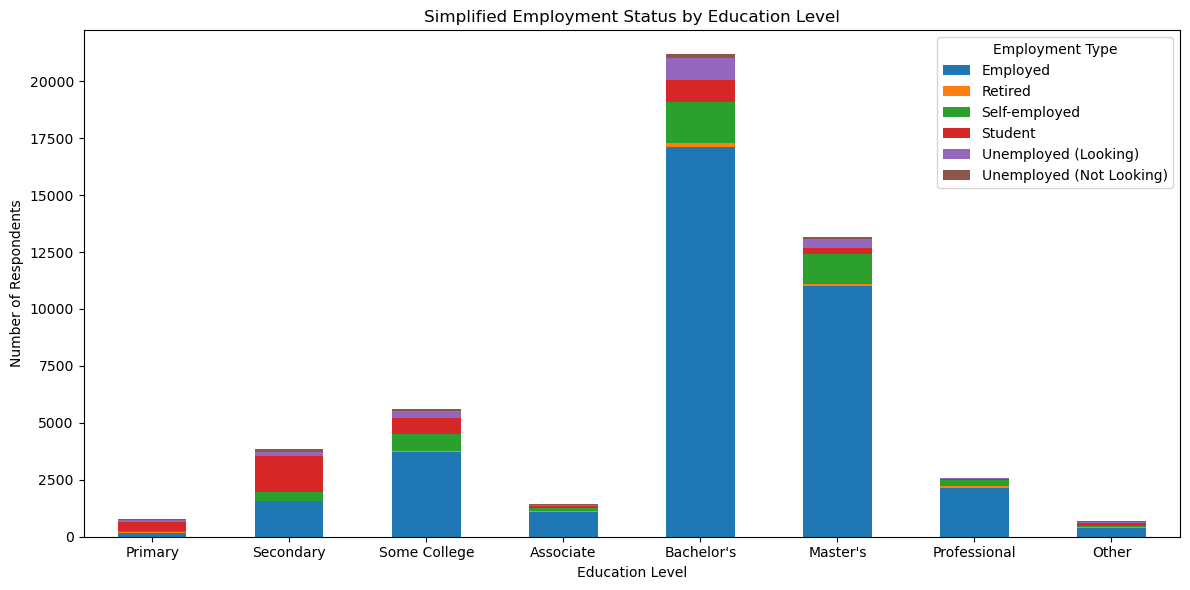

In [124]:
# Cross-tabulate and re-plot as before
edu_emp_crosstab = pd.crosstab(df_simplified['EdLevel_Simple'], df_simplified['Employment_Simple'])
edu_order = ['Primary', 'Secondary', 'Some College', 'Associate', "Bachelor's", "Master's", "Professional", 'Other']
edu_emp_crosstab = edu_emp_crosstab.reindex(index=edu_order)

edu_emp_crosstab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Simplified Employment Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=0)
plt.legend(title='Employment Type')
plt.tight_layout()
plt.show()

### Extra analyses required by check list

In [134]:
# Define mapping from age range strings to numeric midpoints
age_mapping = {
    'Under 18 years old': 16,
    '18-24 years old': 21,
    '25-34 years old': 29.5,
    '35-44 years old': 39.5,
    '45-54 years old': 49.5,
    '55-64 years old': 59.5,
    '65 years or older': 70,
    'Prefer not to say': None
}

# Apply mapping
df_cleaned['Age_Numeric'] = df_cleaned['Age'].map(age_mapping)


In [136]:
# Drop missing values for relevant columns
df_age_corr = df_cleaned[['Age_Numeric', 'CompTotal', 'YearsCodePro']].dropna()

# Compute Pearson correlations
print(df_age_corr.corr(method='pearson'))
print(df_age_corr.corr(method='spearman'))


              Age_Numeric  CompTotal  YearsCodePro
Age_Numeric      1.000000  -0.002823      0.811344
CompTotal       -0.002823   0.000000     -0.001808
YearsCodePro     0.811344  -0.001808      1.000000
              Age_Numeric  CompTotal  YearsCodePro
Age_Numeric      1.000000   0.145024      0.762872
CompTotal        0.145024   1.000000      0.173496
YearsCodePro     0.762872   0.173496      1.000000


### 📊 Your Results:

|              | CompTotal  | YearsCodePro |
| ------------ | ---------- | ------------ |
| **Pearson**  | -0.0028    | **0.8113**   |
| **Spearman** | **0.1450** | **0.7629**   |

---

### ✅ Quick Takeaways:

* **Age vs YearsCodePro**
  Strong correlation (especially Pearson: 0.81) — no surprise, since more age generally means more experience.

* **Age vs CompTotal**

  * Pearson: \~0
  * Spearman: slight positive correlation (0.15)
    → Suggests **no strong linear relationship**, but there may be a mild trend with age brackets and comp.



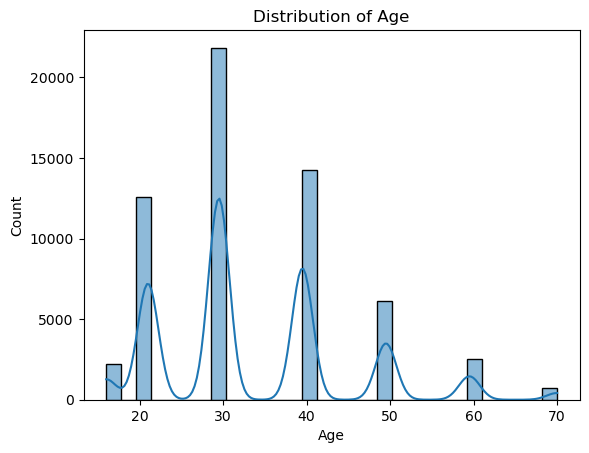

In [141]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_cleaned['Age_Numeric'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


In [149]:
q1 = df_cleaned['CompTotal'].quantile(0.25)
q3 = df_cleaned['CompTotal'].quantile(0.75)
iqr = q3 - q1

lower_bound = max(0, q1 - 1.5 * iqr)
upper_bound = q3 + 1.5 * iqr

print(f"IQR: {iqr}")
print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")


IQR: 190000.0
Lower Bound: 0
Upper Bound: 535000.0


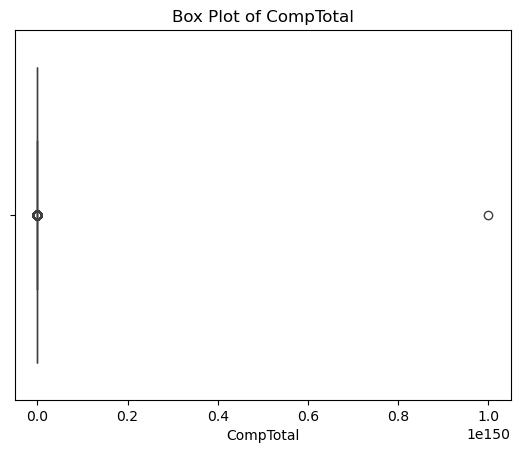

In [145]:
sns.boxplot(x=df_cleaned['CompTotal'])
plt.title('Box Plot of CompTotal')
plt.show()


In [151]:
# Cap CompTotal at 99th percentile
upper_cap = df_cleaned['CompTotal'].quantile(0.99)
df_cleaned['CompTotal_Capped'] = df_cleaned['CompTotal'].clip(upper=upper_cap)


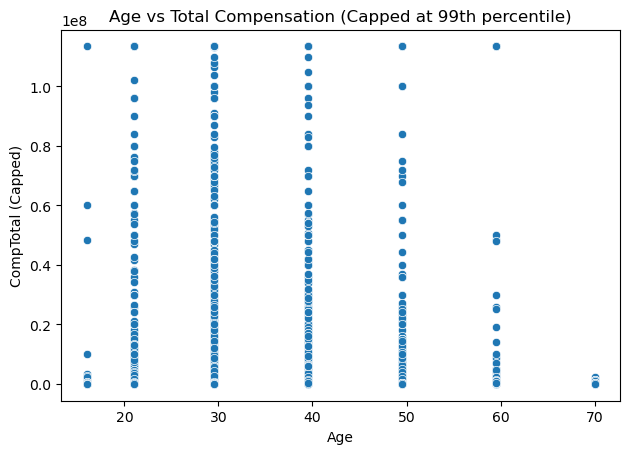

In [153]:
sns.scatterplot(data=df_cleaned, x='Age_Numeric', y='CompTotal_Capped')
plt.title('Age vs Total Compensation (Capped at 99th percentile)')
plt.xlabel('Age')
plt.ylabel('CompTotal (Capped)')
plt.tight_layout()
plt.show()



### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [155]:
## Write your code here
# Export the cleaned and enriched dataset
df_simplified.to_csv('cleaned_stackoverflow_survey.csv', index=False)

print("File saved as 'cleaned_stackoverflow_survey.csv'")


File saved as 'cleaned_stackoverflow_survey.csv'


## ✅ Lab Summary: Analyzing Developer Survey Data

This lab involved exploring, cleaning, transforming, and analyzing Stack Overflow survey data. Below is a summary of the steps taken and key findings:

---

### 🔄 Data Cleaning & Imputation

* **Missing values** were handled in several key columns:

  * `RemoteWork` filled with mode: `"Hybrid (some remote, some in-person)"`
  * `EdLevel` and `Employment` were simplified into broader categories
  * `ConvertedCompYearly` was imputed using **linear regression** on `CompTotal`
    (R² ≈ **0.15**, slope ≈ **2978**, intercept ≈ **49628**)
* **Outliers in compensation** were capped at the 99th percentile to reduce distortion in visualizations.

---

### 📊 Data Exploration & Visualization

#### **Job Satisfaction (`JobSat`)**

* The most common responses were **7, 8, and 6**, on a 0–10 scale.
* Approximately **50%** of responses were missing in this column.

#### **Programming Languages**

* **JavaScript, HTML/CSS, SQL, Python** topped the "worked with" list.
* **Rust** and **Go** had much **higher "want to work with" counts** than actual experience.
* A grouped bar chart revealed trends in language demand and preference gaps.

#### **Remote Work by Country**

* Used a separate dataset with `Country` and `RemoteWork`.
* Mapped and grouped countries with low representation into `"Other"`.
* A grouped bar chart highlighted how remote/hybrid/in-office preferences vary by region.

#### **Job Satisfaction vs Experience**

* `YearsCodePro` and `JobSat` showed a **small positive correlation**:

  * **Pearson:** 0.10
  * **Spearman:** 0.12
* Distribution of `YearsCodePro` was **highly right-skewed** (with many outliers).

#### **Employment vs Education**

* Simplified both `Employment` and `EdLevel` into broader groups.
* A stacked bar chart showed most respondents with **Bachelor’s or Master’s degrees** were employed.
* Fewer respondents held professional degrees, but their employment rate remained high.

---

### 📈 Additional Analyses (Checklist Items)

* **Age** was converted from categorical ranges to numeric midpoints (`Age_Numeric`).
* Correlation of `Age_Numeric` with:

  * `YearsCodePro`: **strong** (Pearson = 0.81)
  * `CompTotal`: weak/nonlinear (Spearman = 0.15)
* **IQR** for `CompTotal` identified unrealistic negative lower bounds; adjusted to zero.
* **Boxplot** revealed skewed compensation distribution with extreme high-end outliers.
* **Scatterplot** of `Age vs CompTotal` improved significantly after **99th percentile capping**.

---

### 🧠 Key Insights

* **Experience, not age**, is a stronger predictor of compensation.
* **Skewed distributions** (like comp and experience) require capping or transformations to analyze effectively.
* **Remote work** trends and language preferences vary widely across countries and experience levels.
* **Simplifying categorical variables** helps reveal meaningful structural patterns.


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
